### 1. Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score
)

### 2. Loading the history and viewing the curves

In [ ]:
with open('/content/drive/MyDrive/sam_resnet50/history/sam_resnet50_history.h5', 'rb') as f:
  history = pickle.load(f)

[]

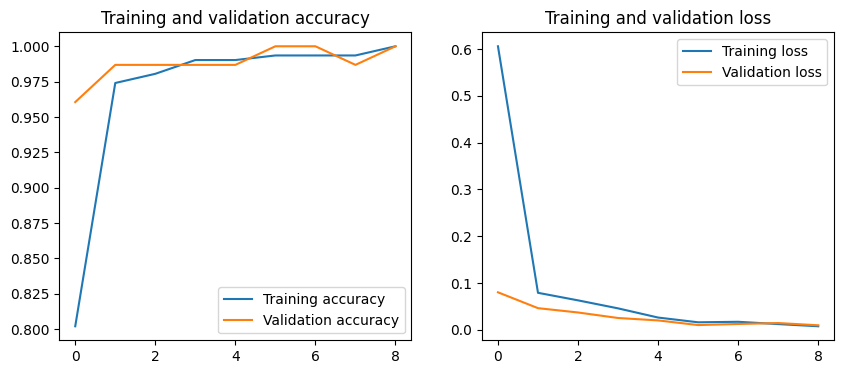

In [ ]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and validation loss')
plt.legend(['Training loss', 'Validation loss'])

plt.plot()

### 3. Loading the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/sam_resnet50/dataset/dataset.csv')

### 4. Preparing the images

In [ ]:
test_df = dataset.sample(frac=1.0, random_state=42)

preprocess_input = tf.keras.applications.resnet.preprocess_input

In [ ]:
preprocess_input = tf.keras.applications.resnet.preprocess_input

class_mode="binary"
image_size = (150, 150)
classes_names=["Sem fissura", "Com fissura"]

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_data = test_gen.flow_from_dataframe(
    test_df,
    x_col="Filepath",
    y_col="Label",
    target_size=image_size,
    color_mode="rgb",
    class_mode=class_mode,
    batch_size=32,
    shuffle=False,
    seed=42
)

### 5. Loading the model

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/sam_resnet50/models/sam_resnet50.h5')

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

### 6. Testing the model

In [ ]:
loss, acc = model.evaluate(test_data)

print(f'loss: {loss}')
print(f'accuracy: {round(acc*100, 4)}%')

15/15 [==============================] - 49s 3s/step - loss: 0.0048 - accuracy: 1.0000
loss: 0.0048093488439917564
accuracy: 100.0%


In [ ]:
y_pred = np.argmax(model.predict(test_data), axis=-1)

15/15 [==============================] - 47s 3s/step


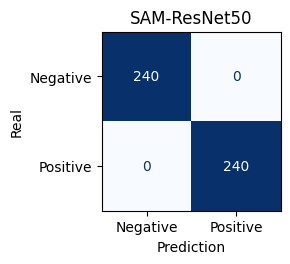

In [ ]:
cm = confusion_matrix(test_data.labels, y_pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
plt.xticks(ticks=np.arange(2), labels=['Negative', 'Positive'])
plt.yticks(ticks=np.arange(2), labels=['Negative', 'Positive'])
plt.tight_layout()

plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title('SAM-ResNet50')

plt.show()

In [ ]:
disp.figure_.savefig('SAMResnet50-confusion-matrix.png')
disp.figure_.savefig('SAMResnet50-confusion-matrix.eps')

In [ ]:
precision = precision_score(test_data.labels, y_pred)
recall = recall_score(test_data.labels, y_pred)
f1_score = f1_score(test_data.labels, y_pred)

In [ ]:
print(f'precison: {round(precision*100, 4)}%')
print(f'recall: {round(recall*100, 4)}%')
print(f'F1 score: {round(f1_score*100, 4)}%')

precison: 100.0%
recall: 100.0%
F1 score: 100.0%


In [ ]:
import cv2

def pred_image(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (150,150))
  img_a = img[np.newaxis, :]

  img_pred = np.argmax(model.predict(img_a), axis=-1)

  return img, img_pred

1/1 [==============================] - 0s 117ms/step


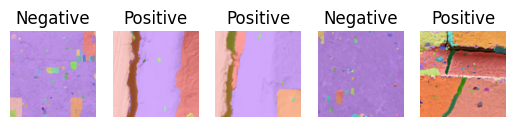

In [ ]:
# first image
img, pred = pred_image('/content/drive/MyDrive/sam_resnet50/dataset/negative/00016.jpg')

plt.subplot(1,5,1)
plt.imshow(img)
plt.title('Positive' if pred == 1 else 'Negative')
plt.axis('off')

# second image
img, pred = pred_image('/content/c_38_252.png')

plt.subplot(1,5,2)
plt.imshow(img)
plt.title('Positive' if pred == 1 else 'Negative')
plt.axis('off')

# third image
img, pred = pred_image('/content/c_38_253.png')

plt.subplot(1,5,3)
plt.imshow(img)
plt.title('Positive' if pred == 1 else 'Negative')
plt.axis('off')

# fourth image
img, pred = pred_image('/content/drive/MyDrive/sam_resnet50/dataset/negative/00033.jpg')

plt.subplot(1,5,4)
plt.imshow(img)
plt.title('Positive' if pred == 1 else 'Negative')
plt.axis('off')

# fifth image
img, pred = pred_image('/content/d_5_127.png')

plt.subplot(1,5,5)
plt.imshow(img)
plt.title('Positive' if pred == 1 else 'Negative')
plt.axis('off')

plt.show()